In [1]:
from google.colab import drive
import pandas as pd
import numpy as np

# Google Drive'ı bağla
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Bitirme/Processed_Records/Record459.csv'

df = pd.read_csv(file_path)

# Inspect the data
print(df.head())
print(df.info())

                  DateTime  VehicleID  HghRslutionTotalVehicleDistance  \
0  2015-11-10 19:28:10.200        187                      277745050.0   
1  2015-11-10 19:28:12.200        187                      277745050.0   
2  2015-11-10 19:28:13.200        187                      277745050.0   
3  2015-11-10 19:28:14.200        187                      277745050.0   
4  2015-11-10 19:28:16.200        187                      277745050.0   

   TachographVehicleSpeed  EngSpeed  ActualEngPercentTorque  AccelPedalPos1  \
0               90.597656    1213.5               11.000000             0.0   
1               90.597656    1223.5               11.000000             0.0   
2               90.597656    1221.5               11.000000             0.0   
3               90.597656    1219.5               11.000000             0.0   
4               90.364583    1214.5               13.333333             0.0   

   BrakePedalPos  PCCM_Slope  DStgy_dmRdcAgAct  EngOilTemp1  EngCoolantTemp  \
0

In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta
import os

def process_data(file_path, output_file_path, window_size_seconds=30, step_size_seconds=15):
    # Load the CSV file
    df = pd.read_csv(file_path, delimiter=',', decimal='.')

    # Convert DateTime to datetime
    df['DateTime'] = pd.to_datetime(df['DateTime'])

    # Sort by DateTime
    df = df.sort_values(by='DateTime')

    # Create a new DataFrame to store the results
    result = []

    # Initialize the window parameters
    window_size = timedelta(seconds=window_size_seconds)
    step_size = timedelta(seconds=step_size_seconds)
    start_time = df['DateTime'].iloc[0]
    end_time = start_time + window_size

    while start_time < df['DateTime'].iloc[-1]:
        window_df = df[(df['DateTime'] >= start_time) & (df['DateTime'] < end_time)]

        if len(window_df) > 0:
            # Compute features for the window
            mean_values = window_df.mean()
            std_values = window_df.std()
            first_last_values = window_df.iloc[[0, -1]]

            # Calculate AvgFuelConsumption
            try:
                eng_fuel_used_diff = first_last_values['EngTotalFuelUsed'].iloc[1] - first_last_values['EngTotalFuelUsed'].iloc[0]
                vehicle_distance_diff = (first_last_values['HghRslutionTotalVehicleDistance'].iloc[1] - first_last_values['HghRslutionTotalVehicleDistance'].iloc[0]) / 1000  # Convert to kilometers

                if vehicle_distance_diff != 0:
                    avg_fuel_consumption = (eng_fuel_used_diff / vehicle_distance_diff) * 100
                    # Filter out impossibly high values
                    if avg_fuel_consumption > 100:  # You can adjust this threshold based on realistic values
                        avg_fuel_consumption = np.nan
                else:
                    avg_fuel_consumption = np.nan
            except ZeroDivisionError:
                avg_fuel_consumption = np.nan

            # Append results
            window_features = {
                'start_time': start_time,
                'end_time': end_time,
                'avg_fuel_consumption': avg_fuel_consumption
            }
            window_features.update({f'{col}_mean': mean_values[col] for col in window_df.columns if col != 'DateTime'})
            window_features.update({f'{col}_std': std_values[col] for col in window_df.columns if col != 'DateTime'})

            result.append(window_features)

        # Move the window
        start_time += step_size
        end_time = start_time + window_size

    # Convert results to DataFrame
    result_df = pd.DataFrame(result)

    # Save the processed data to a new CSV file
    result_df.to_csv(output_file_path, index=False)

# Directory containing the CSV files
input_dir = '/content/drive/My Drive/Bitirme/Processed_Records/'
output_dir = '/content/drive/My Drive/Bitirme/window_it_30/'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each CSV file in the directory
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        input_file_path = os.path.join(input_dir, filename)
        output_file_path = os.path.join(output_dir, f'Processed_{filename}')

        process_data(input_file_path, output_file_path)
        print(f'Processed and saved {filename} to {output_file_path}')


Processed and saved Record438.csv to /content/drive/My Drive/Bitirme/window_it_30/Processed_Record438.csv
Processed and saved Record161.csv to /content/drive/My Drive/Bitirme/window_it_30/Processed_Record161.csv
Processed and saved Record413.csv to /content/drive/My Drive/Bitirme/window_it_30/Processed_Record413.csv
Processed and saved Record163.csv to /content/drive/My Drive/Bitirme/window_it_30/Processed_Record163.csv
Processed and saved Record405.csv to /content/drive/My Drive/Bitirme/window_it_30/Processed_Record405.csv
Processed and saved Record374.csv to /content/drive/My Drive/Bitirme/window_it_30/Processed_Record374.csv
Processed and saved Record181.csv to /content/drive/My Drive/Bitirme/window_it_30/Processed_Record181.csv
Processed and saved Record38.csv to /content/drive/My Drive/Bitirme/window_it_30/Processed_Record38.csv
Processed and saved Record406.csv to /content/drive/My Drive/Bitirme/window_it_30/Processed_Record406.csv
Processed and saved Record201.csv to /content/dr

In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta
import os

def process_data(file_path, output_file_path, window_size_minutes=5, step_size_minutes=1):
    # Load the CSV file
    df = pd.read_csv(file_path, delimiter=',', decimal='.')

    # Convert DateTime to datetime
    df['DateTime'] = pd.to_datetime(df['DateTime'])

    # Sort by DateTime
    df = df.sort_values(by='DateTime')

    # Create a new DataFrame to store the results
    result = []

    # Initialize the window parameters
    window_size = timedelta(minutes=window_size_minutes)
    step_size = timedelta(minutes=step_size_minutes)
    start_time = df['DateTime'].iloc[0]
    end_time = start_time + window_size

    while start_time < df['DateTime'].iloc[-1]:
        window_df = df[(df['DateTime'] >= start_time) & (df['DateTime'] < end_time)]

        if len(window_df) > 0:
            # Compute features for the window
            mean_values = window_df.mean()
            std_values = window_df.std()
            first_last_values = window_df.iloc[[0, -1]]

            # Calculate AvgFuelConsumption
            try:
                eng_fuel_used_diff = first_last_values['EngTotalFuelUsed'].iloc[1] - first_last_values['EngTotalFuelUsed'].iloc[0]
                vehicle_distance_diff = (first_last_values['HghRslutionTotalVehicleDistance'].iloc[1] - first_last_values['HghRslutionTotalVehicleDistance'].iloc[0]) / 1000  # Convert to kilometers

                if vehicle_distance_diff != 0:
                    avg_fuel_consumption = (eng_fuel_used_diff / vehicle_distance_diff) * 100
                    # Filter out impossibly high values
                    if avg_fuel_consumption > 100:  # You can adjust this threshold based on realistic values
                        avg_fuel_consumption = np.nan
                else:
                    avg_fuel_consumption = np.nan
            except ZeroDivisionError:
                avg_fuel_consumption = np.nan

            # Append results
            window_features = {
                'start_time': start_time,
                'end_time': end_time,
                'avg_fuel_consumption': avg_fuel_consumption
            }
            window_features.update({f'{col}_mean': mean_values[col] for col in window_df.columns if col != 'DateTime'})
            window_features.update({f'{col}_std': std_values[col] for col in window_df.columns if col != 'DateTime'})

            result.append(window_features)

        # Move the window
        start_time += step_size
        end_time = start_time + window_size

    # Convert results to DataFrame
    result_df = pd.DataFrame(result)

    # Save the processed data to a new CSV file
    result_df.to_csv(output_file_path, index=False)

# Directory containing the CSV files
input_dir = '/content/drive/My Drive/Bitirme/Processed_Records/'
output_dir = '/content/drive/My Drive/Bitirme/window_it/'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each CSV file in the directory
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        input_file_path = os.path.join(input_dir, filename)
        output_file_path = os.path.join(output_dir, f'Processed_{filename}')

        process_data(input_file_path, output_file_path)
        print(f'Processed and saved {filename} to {output_file_path}')


Processed and saved Record438.csv to /content/drive/My Drive/Bitirme/window_it/Processed_Record438.csv
Processed and saved Record161.csv to /content/drive/My Drive/Bitirme/window_it/Processed_Record161.csv
Processed and saved Record413.csv to /content/drive/My Drive/Bitirme/window_it/Processed_Record413.csv
Processed and saved Record163.csv to /content/drive/My Drive/Bitirme/window_it/Processed_Record163.csv
Processed and saved Record405.csv to /content/drive/My Drive/Bitirme/window_it/Processed_Record405.csv
Processed and saved Record374.csv to /content/drive/My Drive/Bitirme/window_it/Processed_Record374.csv
Processed and saved Record181.csv to /content/drive/My Drive/Bitirme/window_it/Processed_Record181.csv
Processed and saved Record38.csv to /content/drive/My Drive/Bitirme/window_it/Processed_Record38.csv
Processed and saved Record406.csv to /content/drive/My Drive/Bitirme/window_it/Processed_Record406.csv
Processed and saved Record201.csv to /content/drive/My Drive/Bitirme/window

In [2]:
import os
import pandas as pd

# Veri birleştirme
# Yolun tanımlanması
input_directory_path = '/content/drive/My Drive/Bitirme/window_it/'

# Tüm verileri tutacak boş bir liste
all_data = []

# Belirtilen dizindeki her CSV dosyasını tek tek oku ve DataFrame'e dönüştür
for file_name in os.listdir(input_directory_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(input_directory_path, file_name)
        df = pd.read_csv(file_path)
        all_data.append(df)

# Tek bir DataFrame olarak birleştir
combined_df = pd.concat(all_data, ignore_index=True)

# Birleştirilmiş DataFrame'in birkaç satırını göster
print(combined_df.head())
print(combined_df.describe())

                start_time                 end_time  avg_fuel_consumption  \
0  2015-11-03 18:37:10.600  2015-11-03 18:42:10.600              0.000000   
1  2015-11-03 18:38:10.600  2015-11-03 18:43:10.600              0.000000   
2  2015-11-03 18:43:10.600  2015-11-03 18:48:10.600                   NaN   
3  2015-11-03 18:44:10.600  2015-11-03 18:49:10.600                   NaN   
4  2015-11-03 18:45:10.600  2015-11-03 18:50:10.600             51.691306   

   VehicleID_mean  HghRslutionTotalVehicleDistance_mean  \
0           172.0                          2.232866e+08   
1           172.0                          2.232866e+08   
2           172.0                          2.232866e+08   
3           172.0                          2.232866e+08   
4           172.0                          2.232866e+08   

   TachographVehicleSpeed_mean  EngSpeed_mean  ActualEngPercentTorque_mean  \
0                     2.685767     610.611357                     7.845133   
1                     4.28

In [9]:


import pandas as pd
from datetime import datetime

# Örnek veri seti
data = {
    'start_time': ['2015-10-12 17:29:14', '2015-11-10 19:28:10.200', '2015-10-12 17:29:14.300'],
    'end_time': ['2015-10-12 17:34:14', '2015-11-10 19:33:10.200', '2015-10-12 17:34:14.300'],
    'VehicleID_mean': [1, 2, 3]
}

df = pd.DataFrame(data)

# Tarih formatlarını dönüştürmek için yardımcı fonksiyon
def convert_date(date_str):
    for fmt in ("%Y-%m-%d %H:%M:%S.%f", "%Y-%m-%d %H:%M:%S", "%Y-%m-%d %H:%M:%S.%f"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return None

# Tarih sütunlarını dönüştür
df['start_time'] = df['start_time'].apply(convert_date)
df['end_time'] = df['end_time'].apply(convert_date)

# Hatalı dönüşümleri kontrol et
print("Başarılı start_time dönüşümleri:", df['start_time'].notna().sum())
print("Başarılı end_time dönüşümleri:", df['end_time'].notna().sum())

# Hatalı dönüşümleri veriden çıkarma
df.dropna(subset=['start_time', 'end_time'], inplace=True)

print("Sonuç:")
print(df)


Başarılı start_time dönüşümleri: 3
Başarılı end_time dönüşümleri: 3
Sonuç:
               start_time                end_time  VehicleID_mean
0 2015-10-12 17:29:14.000 2015-10-12 17:34:14.000               1
1 2015-11-10 19:28:10.200 2015-11-10 19:33:10.200               2
2 2015-10-12 17:29:14.300 2015-10-12 17:34:14.300               3


In [3]:
combined_df.dropna(inplace=True)

Epoch 1/100
241/241 [==============================] - 17s 42ms/step - loss: 1.0131 - val_loss: 0.1837
Epoch 2/100
241/241 [==============================] - 7s 27ms/step - loss: 0.0760 - val_loss: 0.0215
Epoch 3/100
241/241 [==============================] - 8s 34ms/step - loss: 0.0102 - val_loss: 0.0044
Epoch 4/100
241/241 [==============================] - 7s 27ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 5/100
241/241 [==============================] - 8s 34ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 6/100
241/241 [==============================] - 7s 29ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 7/100
241/241 [==============================] - 9s 36ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 8/100
241/241 [==============================] - 7s 28ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 9/100
241/241 [==============================] - 9s 37ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 10/100
241/241 [==============================] - 6s 27ms/step - loss: 0.00

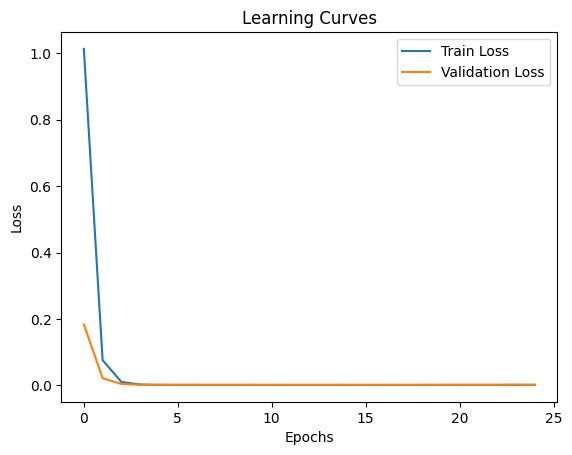

161/161 [==============================] - 2s 7ms/step
Mean Squared Error: 0.0012735624431016736


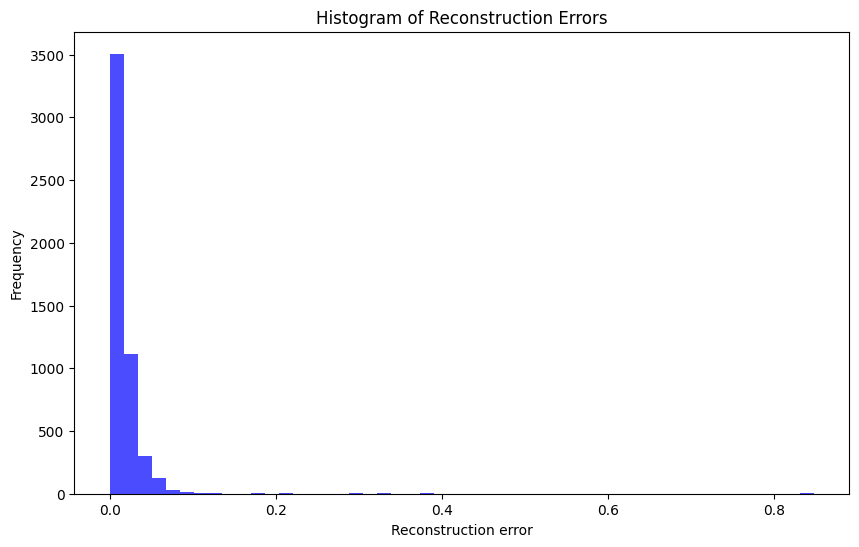

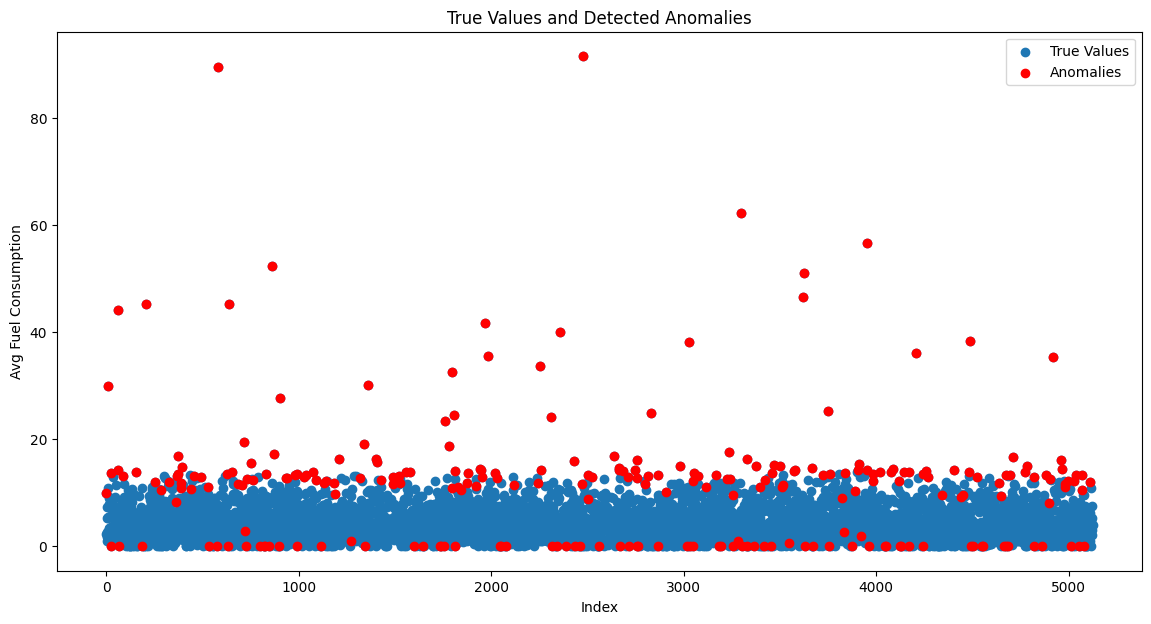

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Özelliklerin seçimi ve ölçeklendirilmesi
features = [ 'HghRslutionTotalVehicleDistance_mean', 'TachographVehicleSpeed_mean',
            'EngSpeed_mean', 'ActualEngPercentTorque_mean', 'AccelPedalPos1_mean', 'BrakePedalPos_mean',
            'PCCM_Slope_mean', 'DStgy_dmRdcAgAct_mean', 'EngOilTemp1_mean', 'EngCoolantTemp_mean',
            'GrossCombinationVehicleWeight_mean', 'EngTotalFuelUsed_mean']

target = 'avg_fuel_consumption'
X = combined_df[features].values
y = combined_df[[target]].values

# X ve y için scaler kullanma
scaler_X = StandardScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# LSTM için veriyi zaman penceresine göre yeniden şekillendirme
window_size = 5
X_series = np.array([X_scaled[i : i + window_size] for i in range(len(X_scaled) - window_size)])
y_series = y_scaled[window_size:]

# Eğitim ve test setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X_series, y_series, test_size=0.2, random_state=42)

# Modeli tanımlama
model = Sequential([
    LSTM(units=128, input_shape=(window_size, len(features)), return_sequences=True, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    LSTM(units=64, return_sequences=True, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    LSTM(units=32, return_sequences=False, kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(units=1)
])

# Modeli derleme
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Erken durdurma tanımlama
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitme
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.25,
    callbacks=[early_stopping],
    shuffle=False
)

# Learning curves görselleştirme
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Modelle tahminlerde bulunma ve performans metriklerini hesaplama
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Reconstruction error hesaplama ve görselleştirme
reconstruction_errors = np.abs(y_test.flatten() - predictions.flatten())
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors, bins=50, alpha=0.7, color='blue')
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors')
plt.show()

# Anomali tespiti
threshold = np.percentile(reconstruction_errors, 95)
anomalies = reconstruction_errors > threshold
anomalous_indices = np.where(anomalies)[0]

# Anomalileri görselleştirme
plt.figure(figsize=(14, 7))
plt.scatter(range(len(y_test)), scaler_y.inverse_transform(y_test), label='True Values')
plt.scatter(anomalous_indices, scaler_y.inverse_transform(y_test)[anomalous_indices], color='r', label='Anomalies')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Avg Fuel Consumption')
plt.title('True Values and Detected Anomalies')
plt.show()

